# The libraries needed

In [2]:
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
import requests
from bs4 import BeautifulSoup as bs
import time
import numpy as np
import pandas as pd
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# Getting the kata URL's

In [218]:
# Given that the webpage uses "infinite" scrolling we'll need to scroll down to the bottom of the page in order to access
# all kata URL's

url = "https://www.codewars.com/kata/search/python?q=&&beta=false"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)

SCROLL_PAUSE_TIME = 2

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

# Extracting the information from the page and turning it into a beautiful soup
variable = driver.page_source
soup = bs(variable)

# Making a list of all URL's beloning to the katas
kata_url = ["https://www.codewars.com/" + i["href"] for i in soup.select("div.item-title > a", href = True)]



====== WebDriver manager ======
Current google-chrome version is 90.0.4430
Get LATEST driver version for 90.0.4430
Driver [C:\Users\kebbe\.wdm\drivers\chromedriver\win32\90.0.4430.24\chromedriver.exe] found in cache


# Scraping

In [219]:
# The lists bellow will become our columns in the DataFrame. 

developer=[]
collection_kata_part_of=[]
kata_name=[]
kata_rank=[]
publish_date=[]
times_attemped=[]
times_skipped=[]
total_code_submissions=[]
total_times_completed=[]
total_times_completed_python=[]
total_stars=[]
percentage_of_votes_with_positive=[]
total_very_satisfied=[]
total_somewhat_satisfied=[]
total_not_satisfied=[]
total_rank_assessments=[]
average_assessed_rank=[]
highest_assessed_rank=[]
lowest_assessed_rank=[]
tags=[]

# We access every kata URL and scrape it. The multiple try/except statements are needed to compensate for the fact that
# the CSS select statements sometime points to non-existing objects at different pages.

x=0
for i in kata_url:
    # The print statement is a way to keep track of progress
    print(x)
    soup = bs(requests.get(i).content)
    
    try:
        developer.append(soup.select("#shell_content > div.px-0.w-full > div > div.w-full.md\:w-5\/12 > div.mt-1.mb-3 > a.ml-4.mr-0")[0].text)
    except:
        developer.append("Anonymous")
    collection_kata_part_of.append(soup.select("#shell_content > div.px-0.w-full > div > div.w-full.md\:w-5\/12 > div.mt-1.mb-3 > a.mr-0.js-add-to-collection.ml-2 > span")[0].text)
    
    kata_name.append(soup.select("h4")[0].text)
    
    kata_rank.append(soup.select("#shell_content > div.px-0.w-full > div > div.w-full.md\:w-5\/12 > div.flex.items-center > div > div > span")[0].text)
    
    try:
        publish_date.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(1) > table > tbody > tr:nth-child(2) > td.p-1.text-right")[0].text)
    except:
        try:
            publish_date.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(1) > table > tbody > tr:nth-child(2) > td.p-1.text-right")[0].text)
        except:
            publish_date.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(1) > table > tbody > tr:nth-child(2) > td.p-1.text-right")[0].text)
    
    try:
        times_attemped.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(1) > table > tbody > tr:nth-child(3) > td.p-1.text-right")[0].text)
    except:
        try:
            times_attemped.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(1) > table > tbody > tr:nth-child(3) > td.p-1.text-right")[0].text)
        except:
            try:
                times_attemped.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(1) > table > tbody > tr:nth-child(3) > td.p-1.text-right")[0].text)
            except:    
                times_attemped.append(np.nan)
    
    try:
        times_skipped.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(1) > table > tbody > tr:nth-child(4) > td.p-1.text-right")[0].text)
    except:
        try:
            times_skipped.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(1) > table > tbody > tr:nth-child(4) > td.p-1.text-right")[0].text)
        except:
            times_skipped.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(1) > table > tbody > tr:nth-child(4) > td.p-1.text-right")[0].text)
    try:
        total_code_submissions.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(1) > table > tbody > tr:nth-child(5) > td.p-1.value.text-right")[0].text)
    except:
        try:
            total_code_submissions.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(1) > table > tbody > tr:nth-child(5) > td.p-1.value.text-right")[0].text)
        except:
            total_code_submissions.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(1) > table > tbody > tr:nth-child(5) > td.p-1.value.text-right")[0].text)
    
    try:
        total_times_completed.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(1) > table > tbody > tr:nth-child(6) > td.p-1.text-right")[0].text)
    except:
        try:
            total_times_completed.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(1) > table > tbody > tr:nth-child(6) > td.p-1.text-right")[0].text)
        except:
            total_times_completed.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(1) > table > tbody > tr:nth-child(6) > td.p-1.text-right")[0].text)
    
    total_times_completed_python.append(soup.select("#shell_content > div.px-0.w-full > div > div.w-full.md\:w-5\/12 > div.mt-1.mb-3 > span:nth-child(5)")[0].text)
    
    total_stars.append(soup.select("#shell_content > div.px-0.w-full > div > div.w-full.md\:w-5\/12 > div.mt-1.mb-3 > a.mr-0.js-add-code-challenge-star > span")[0].text)
    
    percentage_of_votes_with_positive.append(soup.select("#shell_content > div.px-0.w-full > div > div.w-full.md\:w-5\/12 > div.mt-1.mb-3 > span:nth-child(4) > span")[0].text)
    
    try:
        total_very_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(2) > table > tbody > tr:nth-child(2) > td.p-1.text-right")[0].text)
    except:
        try:
            total_very_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(2) > table > tbody > tr:nth-child(2) > td.p-1.text-right")[0].text)
        except:
            total_very_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(2) > table > tbody > tr:nth-child(2) > td.p-1.text-right")[0].text)
    
    try:
        total_somewhat_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(2) > table > tbody > tr:nth-child(3) > td.p-1.text-right")[0].text)
    except:
        try:
            total_somewhat_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(2) > table > tbody > tr:nth-child(3) > td.p-1.text-right")[0].text)
        except:
            total_somewhat_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(2) > table > tbody > tr:nth-child(3) > td.p-1.text-right")[0].text)
    try:
        total_not_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(2) > table > tbody > tr:nth-child(4) > td.p-1.text-right")[0].text)
    except:
        try:
            total_not_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(2) > table > tbody > tr:nth-child(4) > td.p-1.text-right")[0].text)
        except:
            total_not_satisfied.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(2) > table > tbody > tr:nth-child(4) > td.p-1.text-right")[0].text)
    
    try:
        total_rank_assessments.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(2) > table > tbody > tr:nth-child(5) > td.p-1.text-right")[0].text)
        average_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(2) > table > tbody > tr:nth-child(6) > td.p-1.text-right")[0].text)
        highest_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(2) > table > tbody > tr:nth-child(7) > td.p-1.text-right")[0].text)
        lowest_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(6) > div > div:nth-child(2) > table > tbody > tr:nth-child(8) > td.p-1.text-right")[0].text)
    except:
        try:
            total_rank_assessments.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(2) > table > tbody > tr:nth-child(5) > td.p-1.text-right")[0].text)
            average_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(2) > table > tbody > tr:nth-child(6) > td.p-1.text-right")[0].text)
            highest_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(2) > table > tbody > tr:nth-child(7) > td.p-1.text-right")[0].text)
            lowest_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(5) > div > div:nth-child(2) > table > tbody > tr:nth-child(8) > td.p-1.text-right")[0].text)
        except:
            try:
                total_rank_assessments.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(2) > table > tbody > tr:nth-child(5) > td.p-1.text-right")[0].text)
                average_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(2) > table > tbody > tr:nth-child(6) > td.p-1.text-right")[0].text)
                highest_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(2) > table > tbody > tr:nth-child(7) > td.p-1.text-right")[0].text)
                lowest_assessed_rank.append(soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(4) > div > div:nth-child(2) > table > tbody > tr:nth-child(8) > td.p-1.text-right")[0].text)
            except:
                total_rank_assessments.append(np.nan)
                average_assessed_rank.append(np.nan)
                highest_assessed_rank.append(np.nan)
                lowest_assessed_rank.append(np.nan)
    tags.append(", ".join(re.findall('([A-Z][a-z]+)', soup.select("#shell_content > div.w-full.mt-2 > div:nth-child(2) > div.mt-15px")[0].text)))
    x+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


# Data Cleaning & DataFrame

In [255]:
# Creaing a new column containing all votes as an integer
total_votes = list(range(len(total_very_satisfied)))
for i in range(len(total_very_satisfied)):
    total_votes[i] = int(total_very_satisfied[i]) + int(total_somewhat_satisfied[i]) + int(total_not_satisfied[i])

# The next two paragraphs makes sure that these columns display the information in the way we want to
total_times_completed_python_real=list(range(len(total_very_satisfied)))
x=0
for i in total_times_completed_python:
    total_times_completed_python_real[x]=i.split()[0]
    x+=1
    
percentage_of_votes_with_positive_real=list(range(len(total_very_satisfied)))
x=0
for i in percentage_of_votes_with_positive:
    percentage_of_votes_with_positive_real[x]=i.split()[0]
    x+=1

# As the webscraping provide data as strings we need to change the object types to integers if necessarry.
x=0
for i in total_stars:
    total_stars[x] = int(i)
    x+=1
    
x=0
for i in collection_kata_part_of:
    collection_kata_part_of[x] = int(i)
    x+=1
    
x=0
for i in times_attemped:
    times_attemped[x] = int(i)
    x+=1
    
x=0
for i in times_skipped:
    times_skipped[x] = int(i)
    x+=1

x=0
for i in total_code_submissions:
    total_code_submissions[x] = int(i)
    x+=1
    
x=0
for i in total_times_completed:
    total_times_completed[x] = int(i)
    x+=1
    
x=0
for i in total_votes:
    total_votes[x] = int(i)
    x+=1
    
x=0
for i in total_very_satisfied:
    total_very_satisfied[x] = int(i)
    x+=1
    
x=0
for i in total_somewhat_satisfied:
    total_somewhat_satisfied[x] = int(i)
    x+=1
    
x=0
for i in total_not_satisfied:
    total_not_satisfied[x] = int(i)
    x+=1
    
x=0
for i in total_rank_assessments:
    total_rank_assessments[x] = float(i)
    x+=1
    
x=0
for i in percentage_of_votes_with_positive_real:
    percentage_of_votes_with_positive_real[x] = int(i[:-1])
    x+=1

In [3]:
# Creating the DataFrame
df=pd.DataFrame({"kata name":kata_name, "developer":developer, "kata rank":kata_rank, "publish date":publish_date, "total stars":total_stars, "no. collections kata part of":collection_kata_part_of, "times attempted":times_attemped, "times skipped":times_skipped, "total code submissions":total_code_submissions, "total times completed":total_times_completed, "total times completed (P)":total_times_completed_python_real, "percentage of votes with positive feedback [%]":percentage_of_votes_with_positive_real, "total votes":total_votes, "total very satisfied":total_very_satisfied, "total somewhat satisfied":total_somewhat_satisfied, "total not satisfied":total_not_satisfied, "total rank assessment":total_rank_assessments, "average assessed rank":average_assessed_rank, "highest assessed rank":highest_assessed_rank, "lowest assessed rank":lowest_assessed_rank, "tags":tags})
df

NameError: name 'kata_name' is not defined

In [258]:
# Saving the DataFrame as a csv
df.to_csv(r'C:\\Users\\kebbe\\Nod Coding\\Week 4\\Day 4\\Projekt\Beating CodeWars.csv', index=False)

# EDA: Data Analysis Engineering for Max Experience gain analysis

In [234]:
# Making a new DataFrame that is used later on
eda_df = pd.DataFrame()

pandas.core.frame.DataFrame

In [274]:
eda_df["kata name"] = df["kata name"]
eda_df["kata rank"] = df["kata rank"]
eda_df["developer"] = df["developer"]
eda_df["completions/attempts"] = df["total times completed"] / df["times attempted"]
eda_df["completions/submissions"] = df["total times completed"] / df["total code submissions"]
eda_df["skips/attempts"] = df["times skipped"] / df["times attempted"]
eda_df["average of comp/att and comp/sub"] = (eda_df["completions/attempts"] + eda_df["completions/submissions"])/2
eda_df

,kata name,kata rank,developer,completions/attempts,skips/attempts,completions/submissions,average of comp/att and comp/sub
0,(Ready for) Prime Time,5 kyu,boatmeme,0.614959,0.214812,0.162039,0.388499
1,Impress your friends with Brown's Criterion!,6 kyu,Raffaele Fiorillo,0.566667,0.088889,0.383459,0.475063
2,Convert Lambda To Def,6 kyu,The-Kingfisher,0.586207,0.009852,0.097862,0.342034
3,Fibo akin,5 kyu,g964,0.117169,0.587199,0.311449,0.214309
4,Map over a list of lists,7 kyu,Paul Robertson,0.438158,0.010526,0.424745,0.431451
...,...,...,...,...,...,...,...
4056,Javascript filter - 1,7 kyu,ineiti,0.531301,0.191791,0.291026,0.411164
4057,Extract the domain name from a URL,5 kyu,xianpants,0.470869,0.193174,0.122074,0.296472
4058,Return to Sanity,8 kyu,begriffs,0.854822,0.017165,0.363961,0.609391
4059,Basic Training: Add item to an Array,8 kyu,jhoffner,0.833210,0.039148,0.405402,0.619306


# EDA: Fun Fact analysis

Questions to answer:
 - Which developer have made the most katas?
 - Which developer with at least 10 katas have the most average amount of stars?
 - Which devoloper with at least 10 katas have the highest average positive assessment?
 - What is the kata rank distribution among all katas?
 - Which kata is part of most no. collections?
 - Which devoloper has the highest amount of katas that's part of collections?
 - How has the amount of katas published per year increased?
 - Which rank has the highest average percentage of votes with positive feedback?
 - Which kata has the least percentage of votes with positive feedback and also at least 1000 attempts?

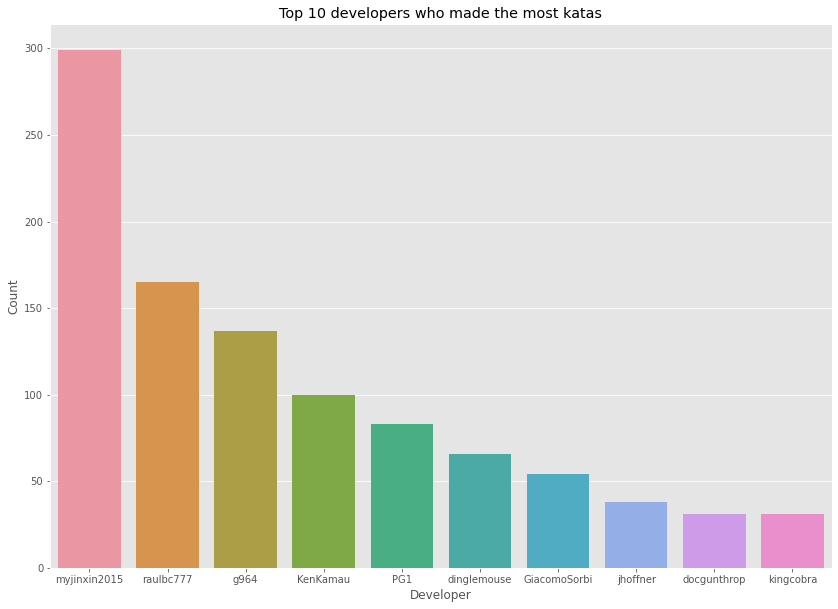

In [303]:
# Which developer have made the most katas?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.groupby("developer", as_index=False).count().sort_values(by="kata name", ascending = False).head(10), x="developer", y="kata name")
ma_plot.set(ylabel="Count")
ma_plot.set(xlabel="Developer")
ma_plot.set(title="Top 10 developers who made the most katas")
plt.show()

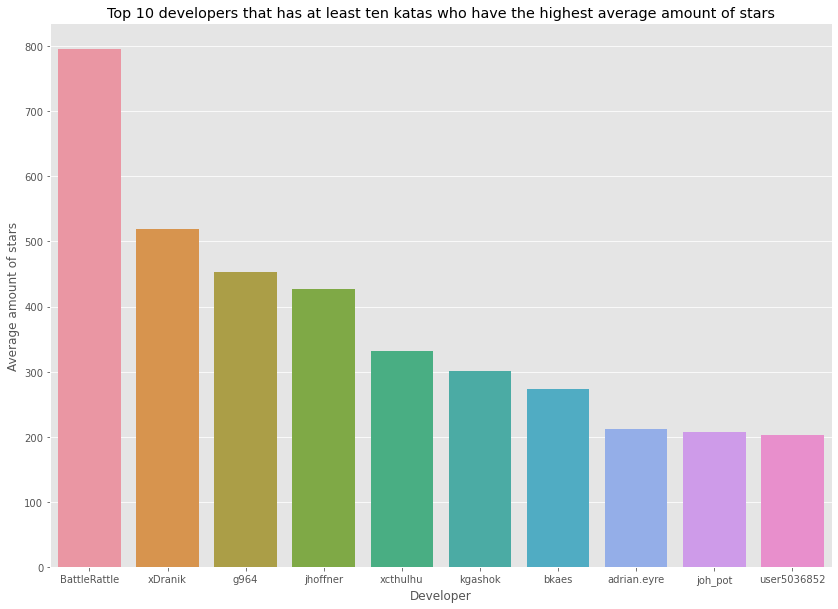

In [430]:
# Which developer with at least 10 katas have the most average amount of stars?
a=df.groupby("developer", as_index=False).count()
b=a.loc[a["kata name"]>=10]
c=list(b["developer"])


plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.loc[df["developer"].isin(c)].groupby("developer", as_index=False).mean().sort_values(by="total stars", ascending = False).head(10), x="developer", y="total stars")
ma_plot.set(ylabel="Average amount of stars")
ma_plot.set(xlabel="Developer")
ma_plot.set(title="Top 10 developers that has at least ten katas who have the highest average amount of stars")
plt.show()

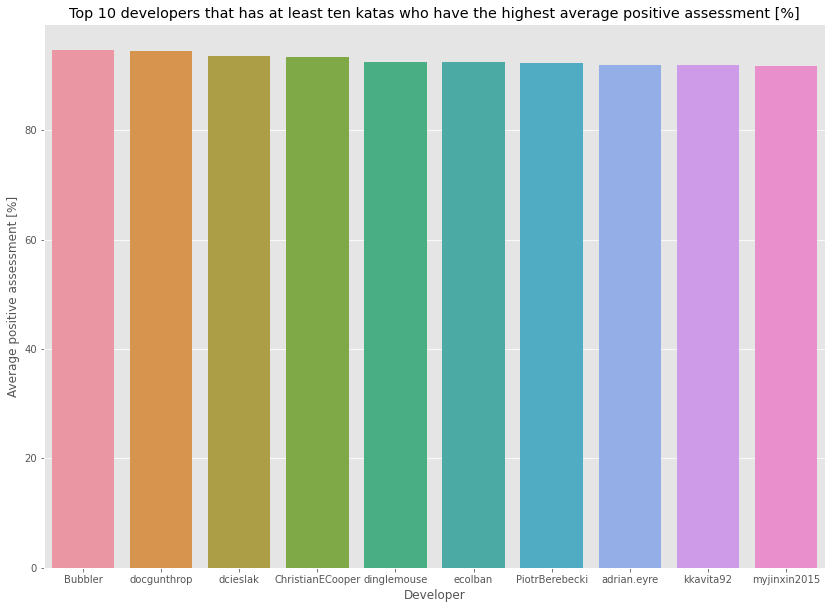

In [431]:
# Which devoloper with at least 10 katas have the highest average positive assessment?
a=df.groupby("developer", as_index=False).count()
b=a.loc[a["kata name"]>=10]
c=list(b["developer"])

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.loc[df["developer"].isin(c)].groupby("developer", as_index=False).mean().sort_values(by="percentage of votes with positive feedback [%]", ascending = False).head(10), x="developer", y="percentage of votes with positive feedback [%]")
ma_plot.set(ylabel="Average positive assessment [%]")
ma_plot.set(xlabel="Developer")
ma_plot.set(title="Top 10 developers that has at least ten katas who have the highest average positive assessment [%]")
plt.show()

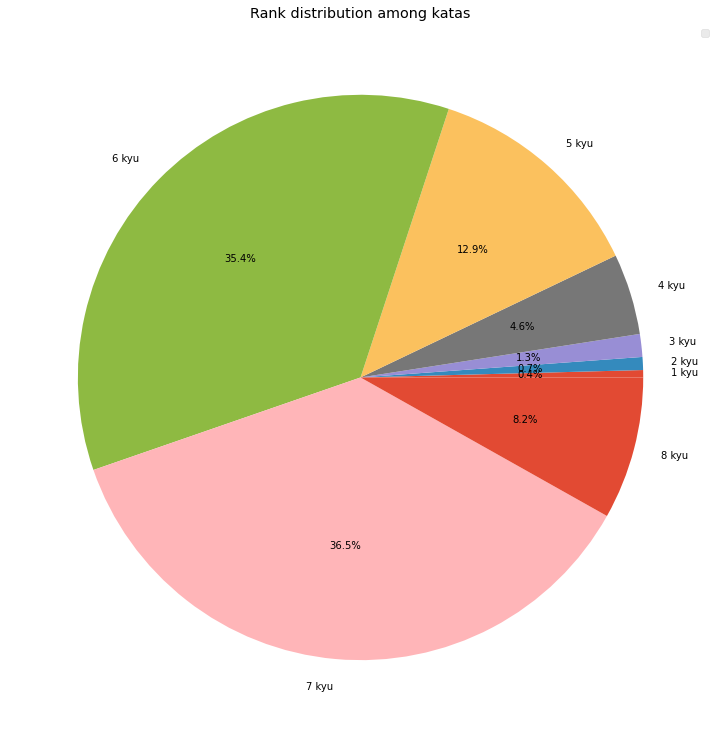

In [340]:
# What is the kata rank distribution among all katas?

ma_plot = df.groupby("kata rank", as_index=False).count()[["kata rank", "kata name"]].plot.pie(y="kata name", autopct="%1.1f%%", figsize=(17,13), labels=["1 kyu", "2 kyu", "3 kyu", "4 kyu", "5 kyu", "6 kyu", "7 kyu", "8 kyu"])
ma_plot.set(ylabel="")
plt.legend("")
plt.title("Rank distribution among katas")
plt.show()

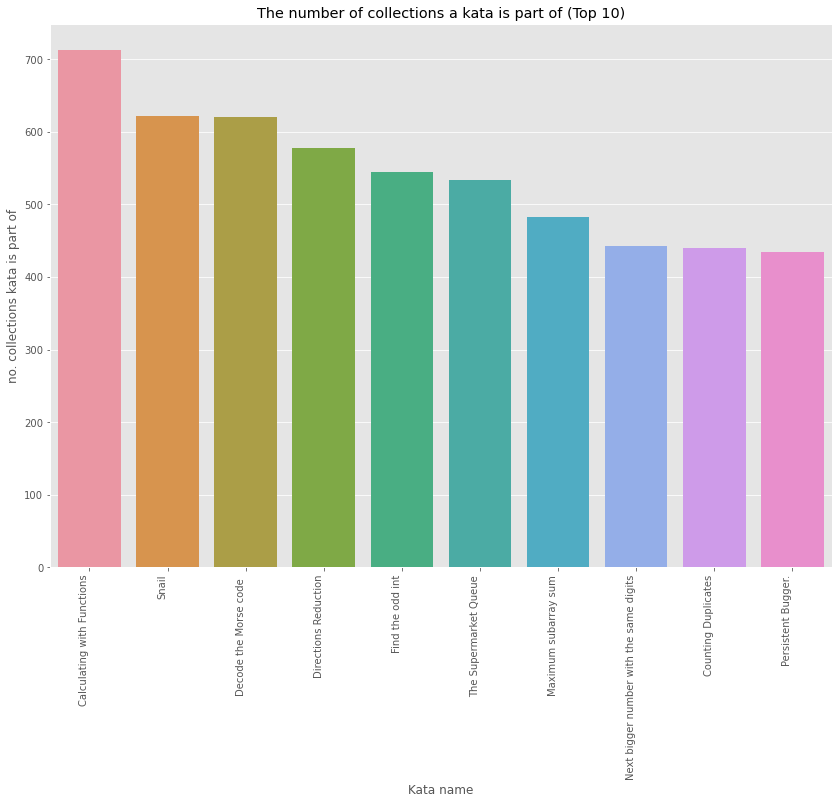

In [401]:
# Which kata is part of most no. collections?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.sort_values(by="no. collections kata part of", ascending=False).head(10), x="kata name", y="no. collections kata part of")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The number of collections a kata is part of (Top 10)")
ma_plot.set(ylabel="no. collections kata is part of")
ma_plot.set(xlabel="Kata name")
plt.show()

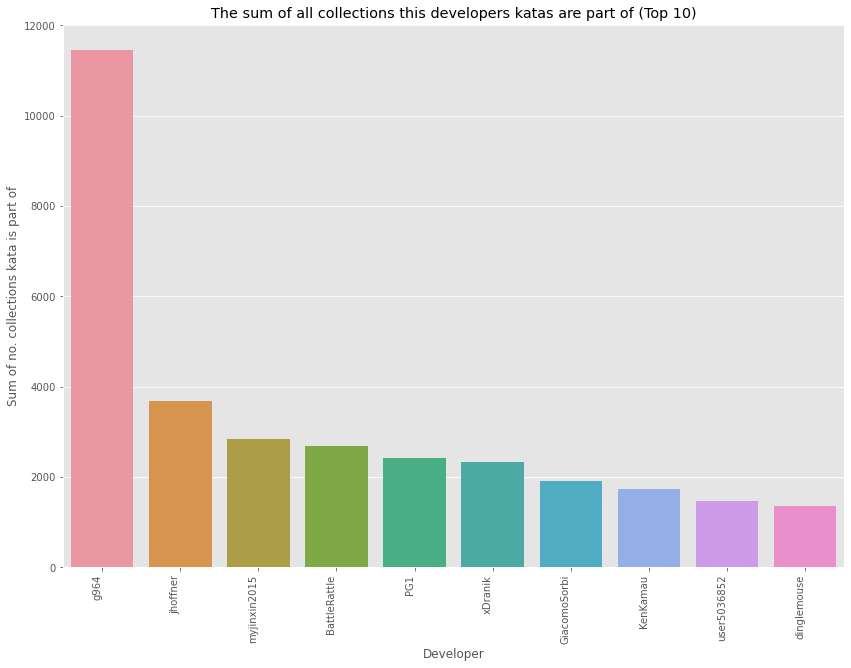

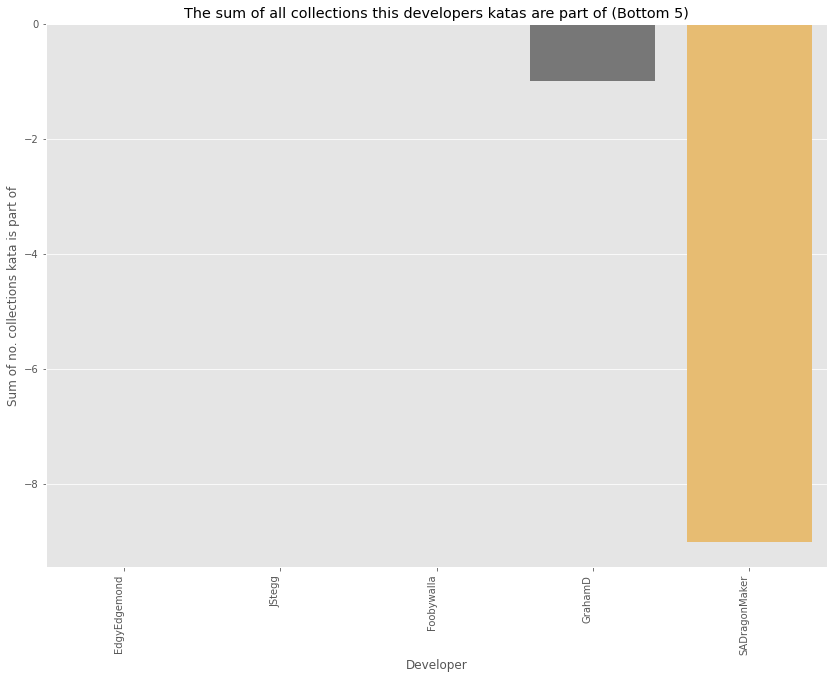

In [400]:
# Which devoloper has the highest amount of katas that's part of collections?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.groupby("developer", as_index=False).sum().sort_values(by="no. collections kata part of", ascending=False).head(10), x="developer", y="no. collections kata part of")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The sum of all collections this developers katas are part of (Top 10)")
ma_plot.set(ylabel="Sum of no. collections kata is part of")
ma_plot.set(xlabel="Developer")
plt.show()

# Making this additional plot due to the odd nature of the result
plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.groupby("developer", as_index=False).sum().sort_values(by="no. collections kata part of", ascending=False).tail(5), x="developer", y="no. collections kata part of")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The sum of all collections this developers katas are part of (Bottom 5)")
ma_plot.set(ylabel="Sum of no. collections kata is part of")
ma_plot.set(xlabel="Developer")
plt.show()

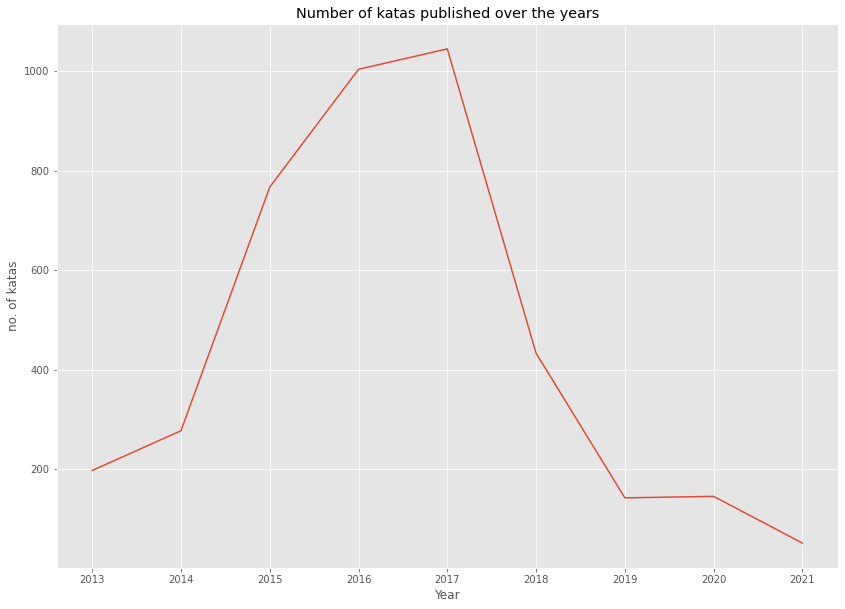

In [394]:
# How has the amount of katas published per year increased?

count_2013=0
count_2014=0
count_2015=0
count_2016=0
count_2017=0
count_2018=0
count_2019=0
count_2020=0
count_2021=0
for i in df["publish date"]:
    if i[-4:]=="2013":
        count_2013+=1
    elif i[-4:]=="2014":
        count_2014+=1
    elif i[-4:]=="2015":
        count_2015+=1
    elif i[-4:]=="2016":
        count_2016+=1
    elif i[-4:]=="2017":
        count_2017+=1
    elif i[-4:]=="2018":
        count_2018+=1
    elif i[-4:]=="2019":
        count_2019+=1
    elif i[-4:]=="2020":
        count_2020+=1
    elif i[-4:]=="2021":
        count_2021+=1

plt.figure(figsize=(14,10))
ma_plot=sns.lineplot(x=["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"], y=[count_2013, count_2014, count_2015, count_2016, count_2017, count_2018, count_2019, count_2020, count_2021])
plt.title("Number of katas published over the years")
ma_plot.set(ylabel="no. of katas")
ma_plot.set(xlabel="Year")
plt.show()

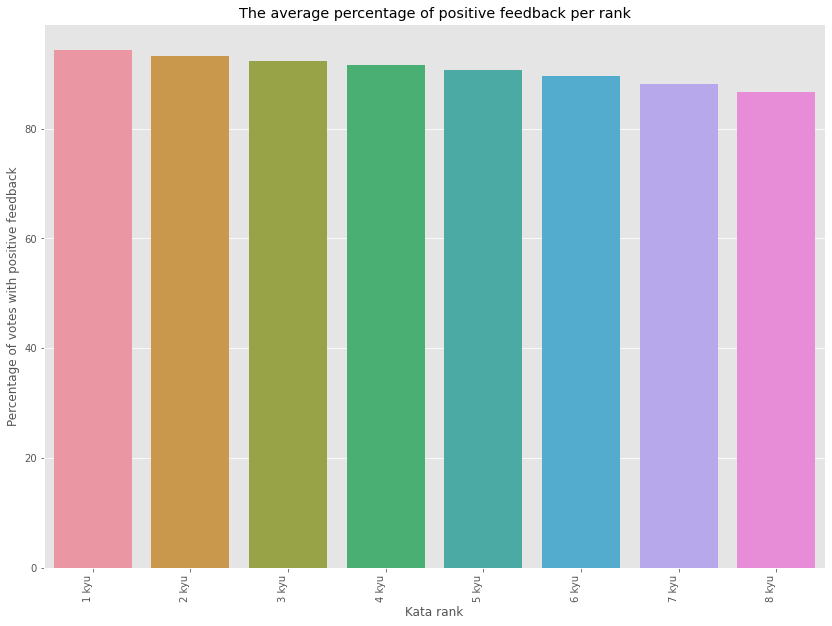

In [399]:
# Which rank has the highest average percentage of votes with positive feedback?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.groupby("kata rank", as_index=False).mean().sort_values(by="percentage of votes with positive feedback [%]", ascending=False), x="kata rank", y="percentage of votes with positive feedback [%]")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The average percentage of positive feedback per rank")
ma_plot.set(ylabel="Percentage of votes with positive feedback")
ma_plot.set(xlabel="Kata rank")
plt.show()

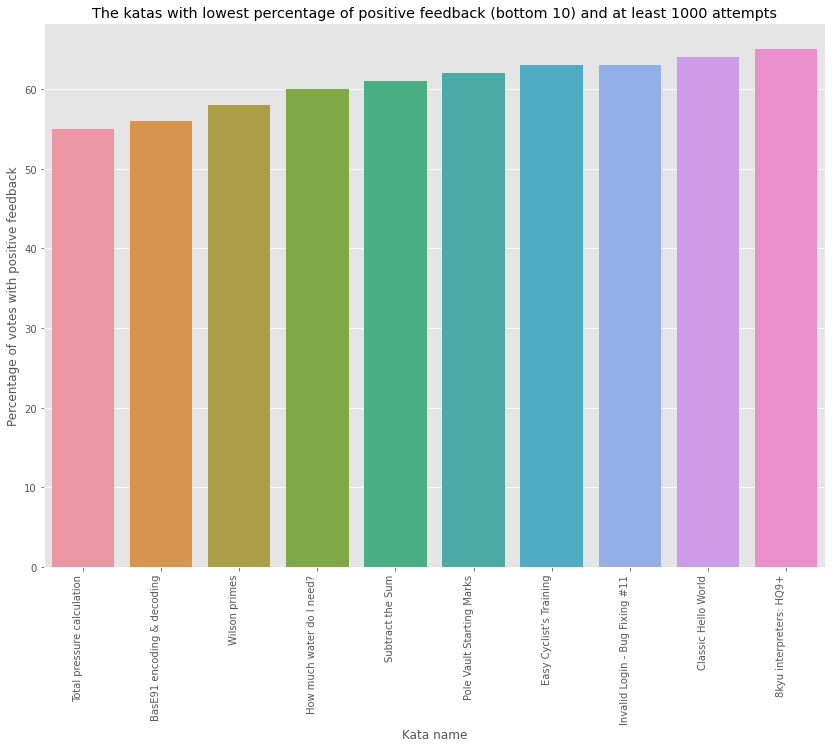

In [409]:
# Which kata has the least percentage of votes with positive feedback and also at least 1000 attempts?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=df.loc[df["times attempted"] >= 1000].sort_values(by="percentage of votes with positive feedback [%]").head(10), x="kata name", y="percentage of votes with positive feedback [%]")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The katas with lowest percentage of positive feedback (bottom 10) and at least 1000 attempts")
ma_plot.set(ylabel="Percentage of votes with positive feedback")
ma_plot.set(xlabel="Kata name")
plt.show()

# EDA: Max Experience gain analysis
To maximize your experience gain per time unit you will need to:
 - Complete katas, the higher the rank the better
 - Complete them fast
 - Not waste time with katas that are too hard or take too long to complete

Therefore, the questions to answer are:
 - Which kata has the highest and lowest skipped/attempts? (can be grouped by rank)
 - Which kata has the highest and lowest completed/attempts? (can be grouped by rank)
 - Which kata has the highest and lowest completed/submissions? (can be grouped by rank)
 - Which kata has the highest average of completed/attempts + completed/submissions? (can be grouped by rank)
 - Which rank 5 kata has the highest average of completed/attempts + completed/submissions?
 - Which kata rank has the highest and lowest average completed/attempts?
 - Which kata rank has the highest and lowest average skipped/attempts?
 - Which kata rank has the highest and lowest average completed/submissions?
 - Which kata rank has the highest average of completed/attempts + completed/submissions?

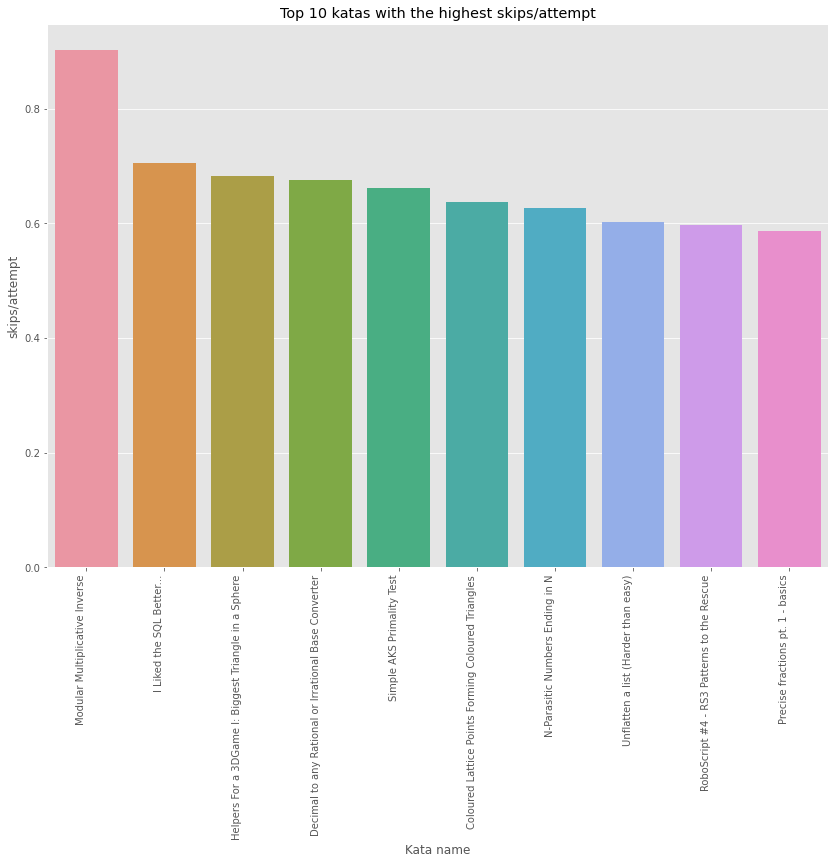

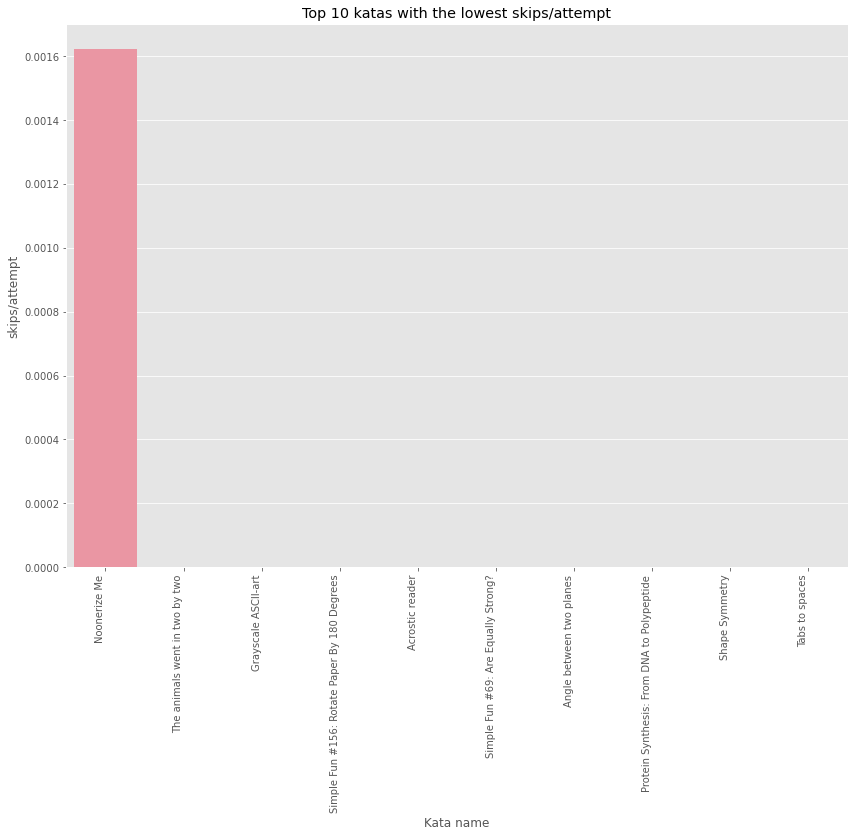

In [440]:
# Which kata has the highest and lowest skipped/attempts? (can be sorted by rank)

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.sort_values(by="skips/attempts", ascending= False).head(10), x="kata name", y="skips/attempts")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 katas with the highest skips/attempt")
ma_plot.set(ylabel="skips/attempt")
ma_plot.set(xlabel="Kata name")
plt.show()

# Pretty pointless plot
plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.sort_values(by="skips/attempts", ascending= False).tail(10), x="kata name", y="skips/attempts")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 katas with the lowest skips/attempt")
ma_plot.set(ylabel="skips/attempt")
ma_plot.set(xlabel="Kata name")
plt.show()

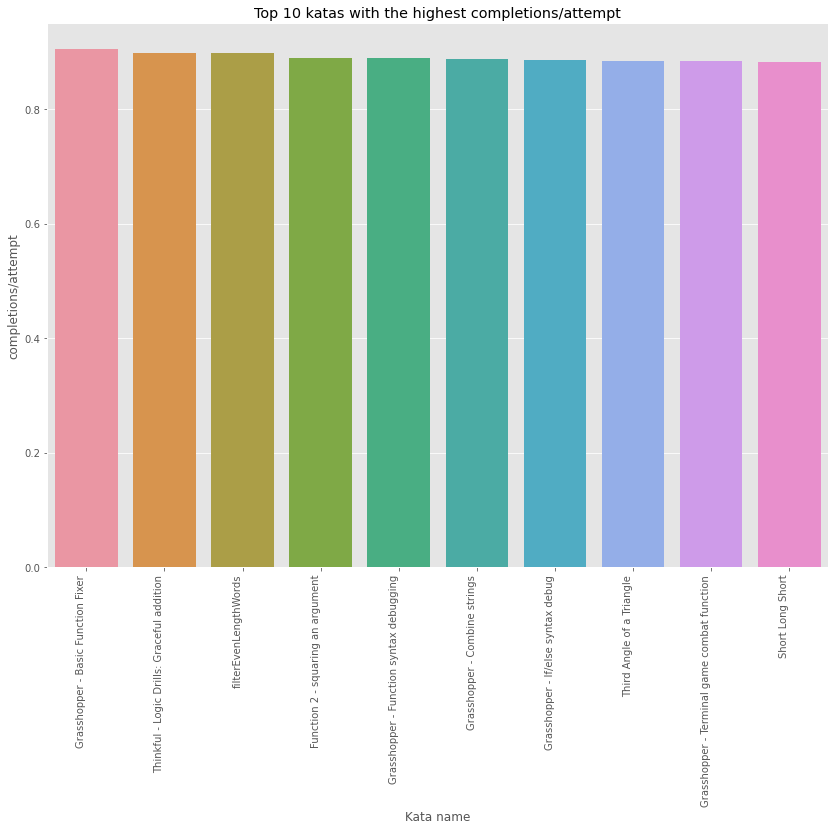

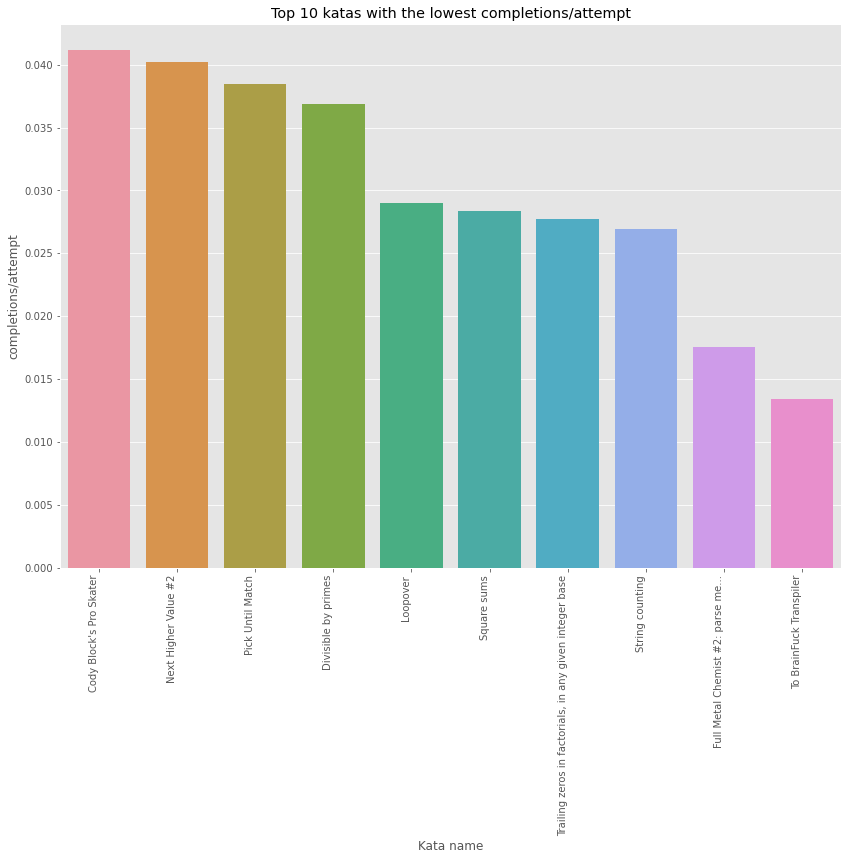

In [442]:
# Which kata has the highest and lowest completed/attempts? (can be sorted by rank

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.sort_values(by="completions/attempts", ascending= False).head(10), x="kata name", y="completions/attempts")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 katas with the highest completions/attempt")
ma_plot.set(ylabel="completions/attempt")
ma_plot.set(xlabel="Kata name")
plt.show()

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.sort_values(by="completions/attempts", ascending= False).tail(10), x="kata name", y="completions/attempts")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 katas with the lowest completions/attempt")
ma_plot.set(ylabel="completions/attempt")
ma_plot.set(xlabel="Kata name")
plt.show()

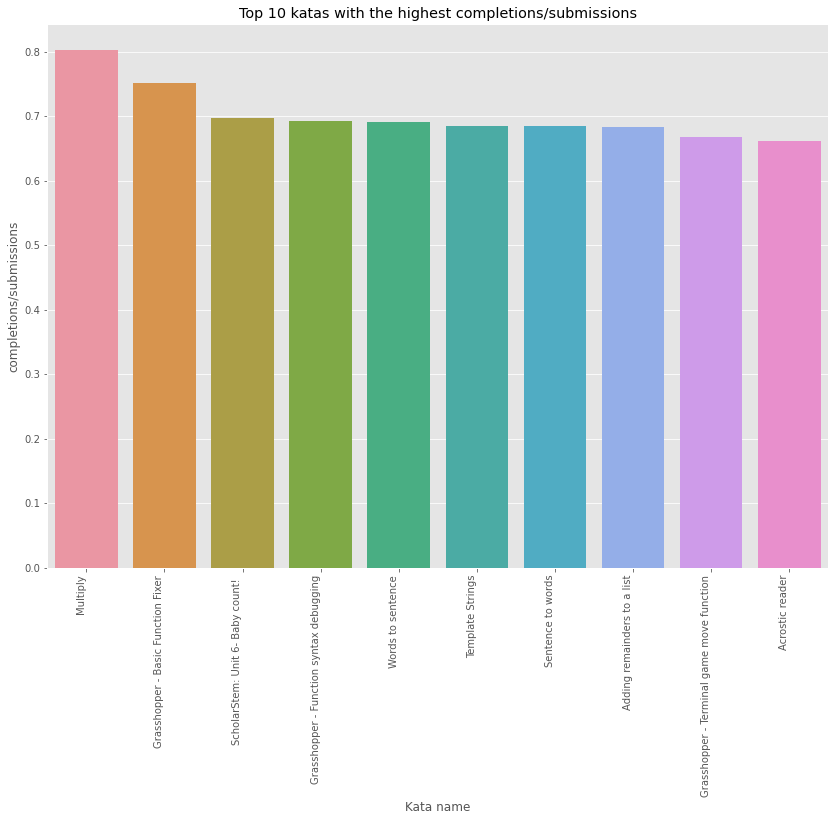

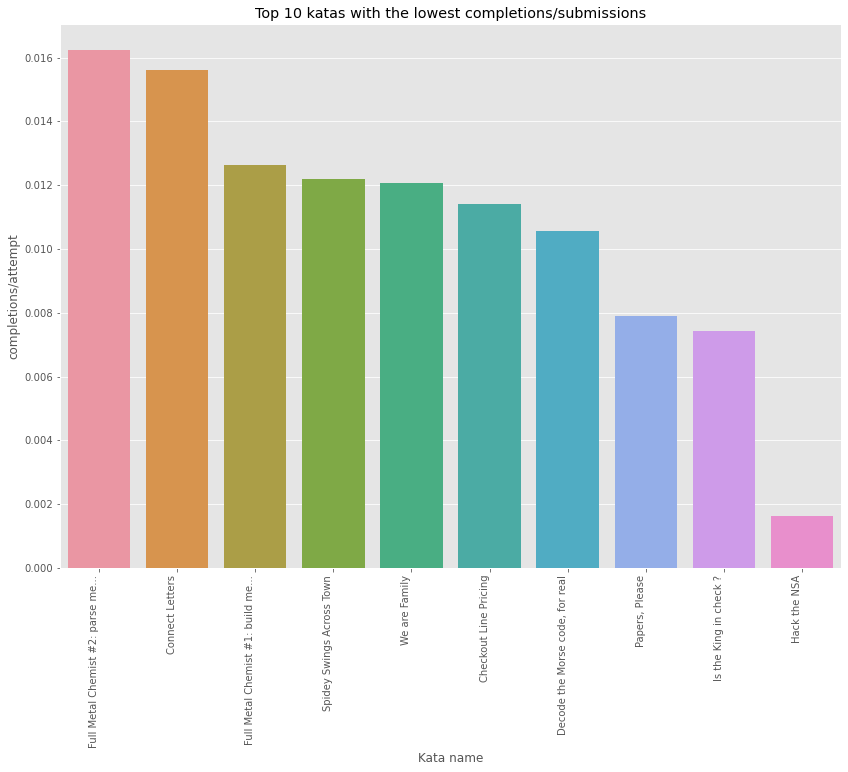

In [443]:
# Which kata has the highest and lowest completed/submissions? (can be sorted by rank)

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.sort_values(by="completions/submissions", ascending= False).head(10), x="kata name", y="completions/submissions")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 katas with the highest completions/submissions")
ma_plot.set(ylabel="completions/submissions")
ma_plot.set(xlabel="Kata name")
plt.show()

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.sort_values(by="completions/submissions", ascending= False).tail(10), x="kata name", y="completions/submissions")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 katas with the lowest completions/submissions")
ma_plot.set(ylabel="completions/attempt")
ma_plot.set(xlabel="Kata name")
plt.show()

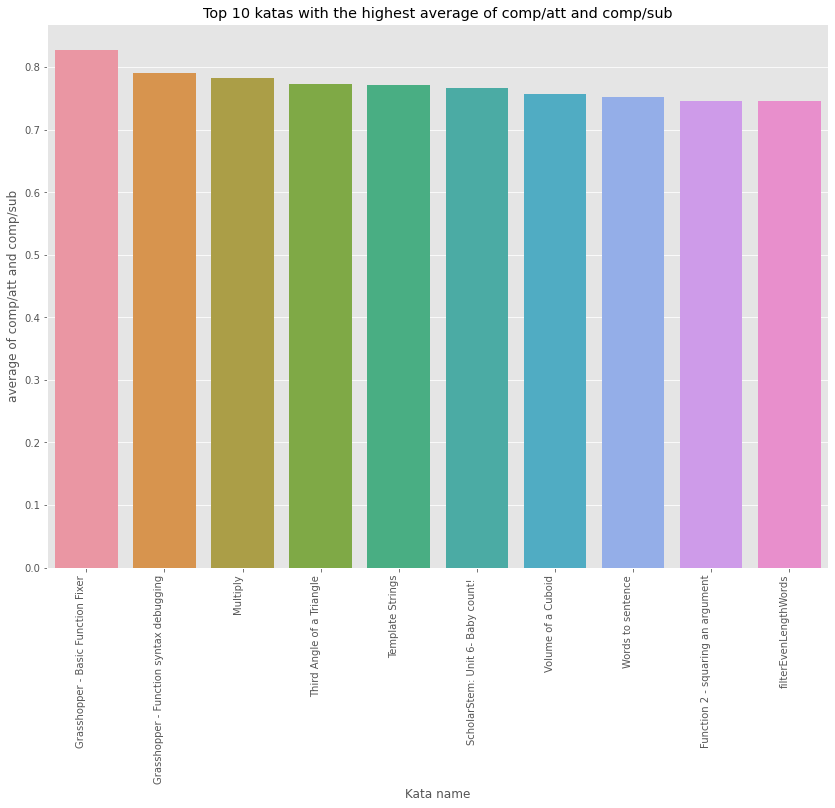

In [444]:
# Which kata has the highest average of completed/attempts + completed/submissions? (can be sorted by rank)

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.sort_values(by="average of comp/att and comp/sub", ascending= False).head(10), x="kata name", y="average of comp/att and comp/sub")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 katas with the highest average of comp/att and comp/sub")
ma_plot.set(ylabel="average of comp/att and comp/sub")
ma_plot.set(xlabel="Kata name")
plt.show()

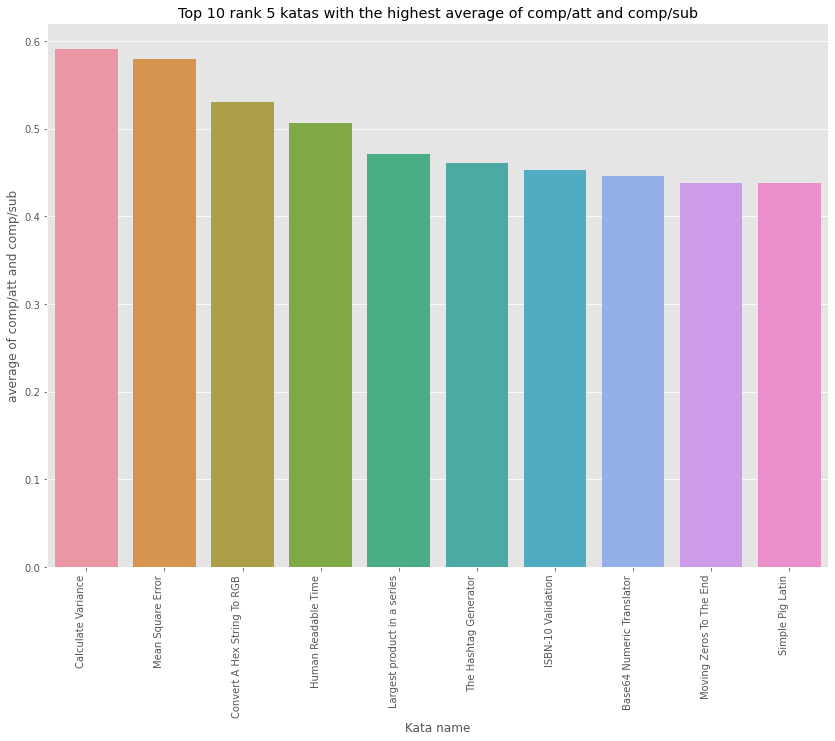

In [451]:
# Which rank 5 kata has the highest average of completed/attempts + completed/submissions?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.loc[eda_df["kata rank"]=="5 kyu"].sort_values(by="average of comp/att and comp/sub", ascending= False).head(10), x="kata name", y="average of comp/att and comp/sub")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Top 10 rank 5 katas with the highest average of comp/att and comp/sub")
ma_plot.set(ylabel="average of comp/att and comp/sub")
ma_plot.set(xlabel="Kata name")
plt.show()

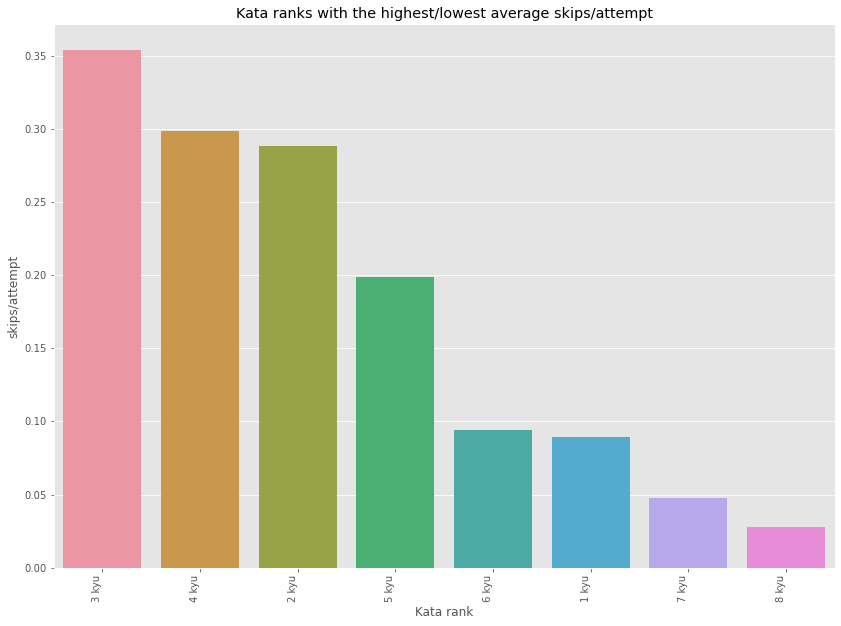

In [463]:
# Which kata rank has the highest and lowest average completed/attempts?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.groupby("kata rank", as_index=False).mean().sort_values(by="skips/attempts", ascending= False).head(10), x="kata rank", y="skips/attempts")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Kata ranks with the highest/lowest average skips/attempt")
ma_plot.set(ylabel="skips/attempt")
ma_plot.set(xlabel="Kata rank")
plt.show()

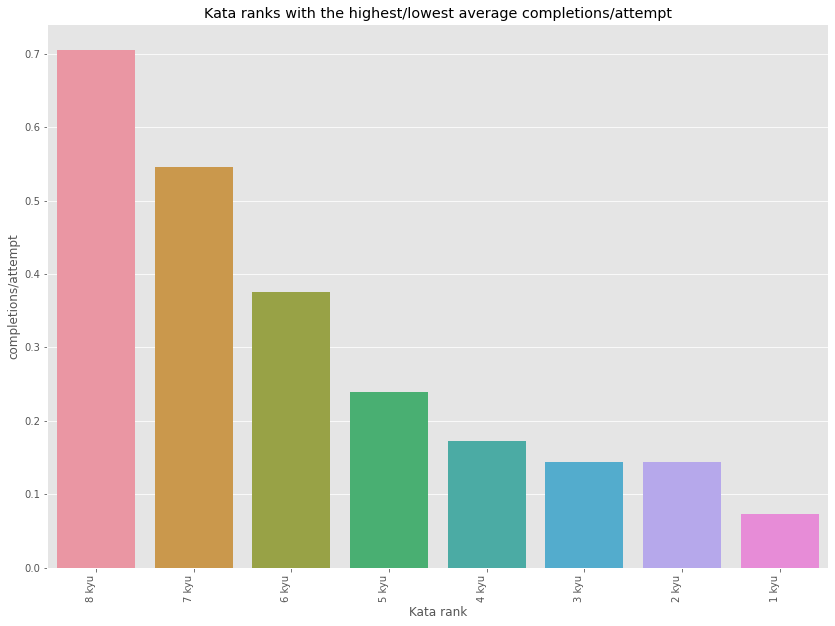

In [464]:
# Which kata rank has the highest and lowest average skipped/attempts?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.groupby("kata rank", as_index=False).mean().sort_values(by="completions/attempts", ascending= False).head(10), x="kata rank", y="completions/attempts")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Kata ranks with the highest/lowest average completions/attempt")
ma_plot.set(ylabel="completions/attempt")
ma_plot.set(xlabel="Kata rank")
plt.show()

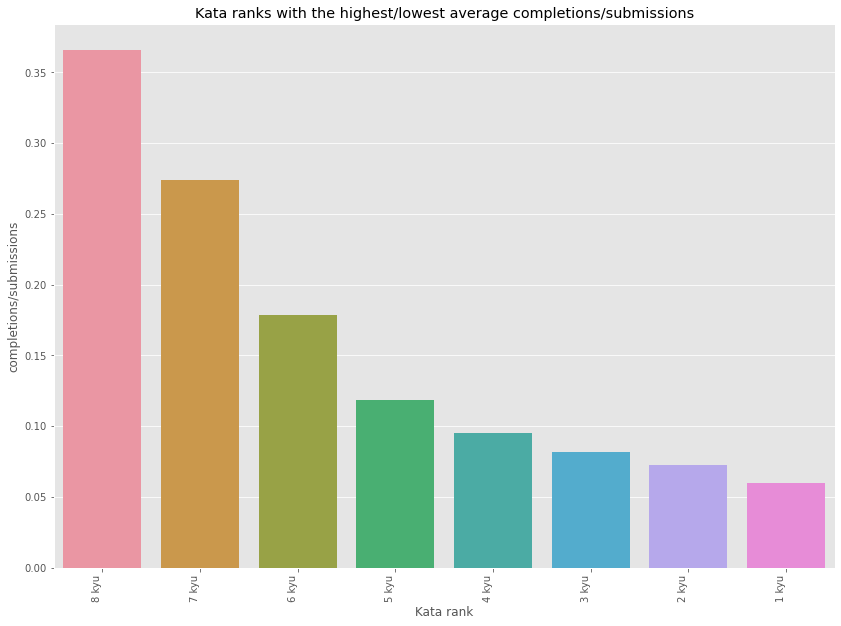

In [465]:
# Which kata rank has the highest and lowest average completed/submissions?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.groupby("kata rank", as_index=False).mean().sort_values(by="completions/submissions", ascending= False).head(10), x="kata rank", y="completions/submissions")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Kata ranks with the highest/lowest average completions/submissions")
ma_plot.set(ylabel="completions/submissions")
ma_plot.set(xlabel="Kata rank")
plt.show()

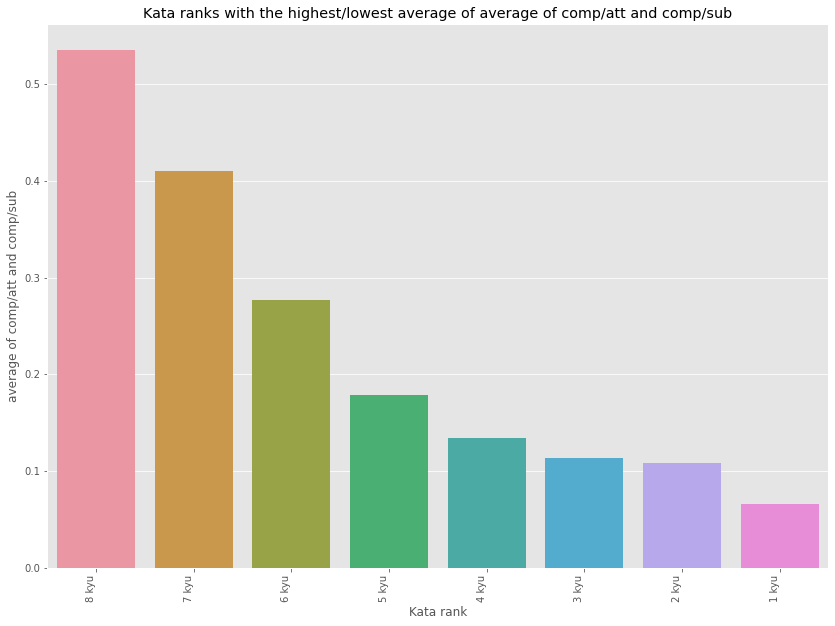

In [467]:
# Which kata rank has the highest average of completed/attempts + completed/submissions?

plt.figure(figsize=(14,10))
ma_plot=sns.barplot(data=eda_df.groupby("kata rank", as_index=False).mean().sort_values(by="average of comp/att and comp/sub", ascending= False).head(10), x="kata rank", y="average of comp/att and comp/sub")
ma_plot.set_xticklabels(ma_plot.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("Kata ranks with the highest/lowest average of average of comp/att and comp/sub")
ma_plot.set(ylabel="average of comp/att and comp/sub")
ma_plot.set(xlabel="Kata rank")
plt.show()